In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data set
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')
#label the data
true['status'] = 0
fake['status'] = 1

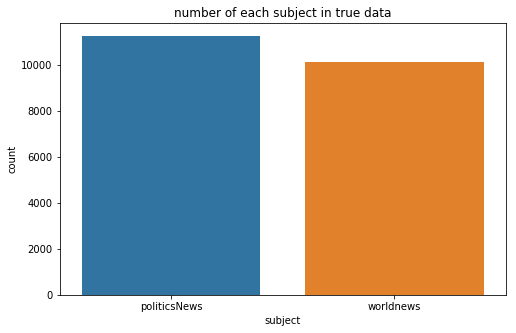

In [3]:
# data analysis on the true and fake data set
plt.figure(figsize=(8,5))
sns.countplot("subject", data=true)
plt.title("number of each subject in true data")
plt.show()

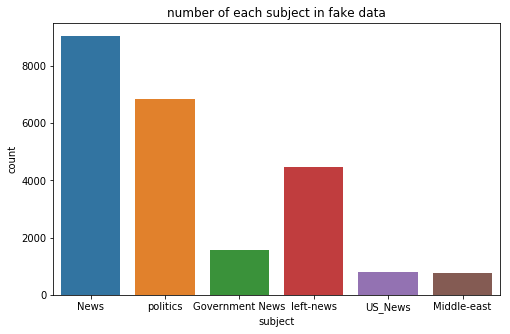

In [4]:
plt.figure(figsize=(8,5))
sns.countplot("subject", data=fake)
plt.title("number of each subject in fake data")
plt.show()

In [5]:
true.head(5)

,title,text,subject,date,status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [6]:
fake.head(5)

,title,text,subject,date,status
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
#combain the true news and fake news
original_news = pd.concat([true, fake])
news= original_news.sample(frac = 0.35)
news.title = news.title.str.lower()
news.text = news.text.str.lower()
news = news.drop(columns = ['subject','date'])

In [8]:
#combine the title with text
news.text = news.title + ' ' + news.text
news = news.drop(columns = ['title'])

In [9]:
news.head(5)

,text,status
15446,taxpayers paid same women who crushed babies’ ...,1
22248,trump revives keystone and dakota access pipel...,1
13354,wow! watch side by side comparison of hillary’...,1
16349,democrat thugs vandalize republican offices ac...,1
3051,gop rep’s defense of jeff sessions is straigh...,1


In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(news, test_size = 0.3, random_state = 7)

In [37]:
train.shape

(10999, 2)

In [38]:
test.shape

(4715, 2)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
fitting = list(train.text)
cv.fit(fitting)
features = cv.transform(fitting).toarray()
inv_vocab = {v: k for k, v in cv.vocabulary_.items()}
vocabulary = [inv_vocab[i] for i in range(len(inv_vocab))]
new_train = pd.DataFrame(features, columns = vocabulary)
to_remove = list(new_train.sum(axis = 0).sort_values()[:65000].index)
new_train = new_train.drop(columns = to_remove)

In [32]:
new_train.head(5)

,000,10,100,11,12,13,14,15,16,17,...,world,worst,wrong,wrote,year,years,yes,york,young,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
test_features = cv.transform(list(test.text)).toarray()
new_test = pd.DataFrame(test_features, columns = vocabulary)
new_test = new_test.drop(columns = to_remove)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel='linear')
svc.fit(new_train, train.status)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
predict_linear = svc.predict(new_test)
print("the acc of linear SVM",accuracy_score(predict_linear, test.status))

the acc of linear SVM 0.9843054082714741


In [19]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(new_train, train.status)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
predict_rbf = svc_rbf.predict(new_test)
print("the acc of RBF_SVM is ",accuracy_score(predict_rbf, test.status))

the acc of RBF_SVM is  0.9893955461293743


In [21]:
#build the naive bais model

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import string
def process_text(s):
    nopunc = [char for char in s if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_string

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process_text)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])
NB_model=pipeline.fit(train.text,train.status)

In [34]:
predict_NB = NB_model.predict(test.text)

In [41]:
print("the acc of NB model is ",accuracy_score(predict_NB,test.status))

the acc of NB model is  0.9527041357370095
